In [48]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [42]:
dir = "../data"
data_files = os.listdir(dir)

In [43]:
dframes = [pd.read_csv(dir + '/' +  file) for file in data_files]
print(dframes[0].head())

        t        p0        p1        p2        p3        p4        p5  \
0  0.0001  0.483104  0.511671  0.528659  0.425019  0.568302  0.473045   
1  0.0002  0.484313  0.509575  0.530415  0.424420  0.568030  0.472703   
2  0.0003  0.485526  0.507481  0.532135  0.423887  0.567695  0.472395   
3  0.0004  0.486744  0.505392  0.533817  0.423421  0.567297  0.472122   
4  0.0005  0.487965  0.503309  0.535460  0.423022  0.566837  0.471883   

         p6        p7        p8  ...       p41       p42       p43       p44  \
0  0.459018  0.510793  0.453619  ...  0.500002  0.462073  0.497940  0.516632   
1  0.459570  0.510696  0.454632  ...  0.500667  0.462010  0.497675  0.515224   
2  0.460125  0.510560  0.455687  ...  0.501301  0.461954  0.497426  0.513796   
3  0.460684  0.510386  0.456782  ...  0.501903  0.461907  0.497191  0.512349   
4  0.461244  0.510176  0.457916  ...  0.502475  0.461867  0.496970  0.510887   

        p45       p46       p47       p48       p49  walltime  
0  0.493616  0.5

In [44]:
def avg_time(df):
    times = df.loc[:, df.columns == "walltime"].values
    avg_time = np.mean(times)
    std_time = np.std(times)
    return (avg_time, std_time)

In [51]:
time_stats = [avg_time(df) for df in dframes]
avg_times = np.array([tup[0] for tup in time_stats])
std_times = np.array([tup[1] for tup in time_stats])

In [52]:
# get digits from the filenames.
def get_all_digits(strn):
    digit_str = []
    for ch in strn:
        if ch.isdigit():
            digit_str.append(ch)
    return ''.join(digit_str)

num_nodes = np.array([int(get_all_digits(strn)) for strn in data_files])

In [75]:
# Fit a line to the data in the chosen log scale. 
linreg_result = linregress(np.log2(num_nodes), np.log10(avg_times))
fit_x = np.linspace(np.min(num_nodes), np.max(num_nodes), num=50)
alpha = linreg_result.slope
beta = linreg_result.intercept
fit_y = 10.0 ** np.log2(2.0 ** beta * fit_x ** alpha)

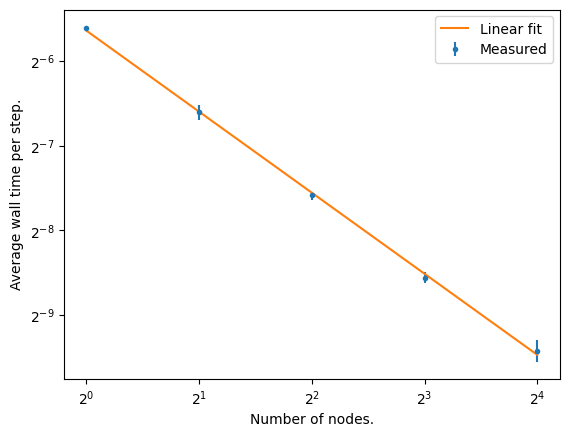

In [82]:
fig, ax = plt.subplots()
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)
ax.errorbar(num_nodes, avg_times, yerr=std_times, \
            linestyle='', marker='.', label="Measured")
ax.plot(fit_x, fit_y, label="Linear fit")
ax.set_xlabel("Number of nodes.")
ax.set_ylabel("Average wall time per step.")
ax.legend()